In [56]:
! pip install numpy pandas seaborn matplotlib scikit-learn xgboost

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV


from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings('ignore')

# job = pd.read_csv('/Users/macbookair/Desktop/project/Resume_Analyser/resume-job-matching/data/Preprocessed/Cleaned_job.csv')
resume = pd.read_csv('/Users/macbookair/Desktop/project/Resume_Analyser/resume-job-matching/data/Preprocessed/Cleaned_resume.csv')

In [58]:
pd.set_option('max_colwidth', 800)

In [59]:
resume.head(2)

,Category,cleaned_resume
0,data science,programming language python pandas numpy scipy scikitlearn matplotlib sql java javascriptjquery machine learn regression svm nave baye knn random forest decision tree boost technique cluster analysis word embed sentiment analysis natural language process dimensionality reduction topic model lda nmf pca neural net database visualization mysql sqlserver cassandra hbase elasticsearch d3js dcjs plotly kibana matplotlib ggplot tableau other regular expression html css angular 6 logstash kafka python flask git docker computer vision open cv understand deep learningeducation detail datum science assurance associate datum science assurance associate ernst young llp skill detail javascript exprience 24 month jquery exprience 24 month python exprience 24 monthscompany detail company ernst young ...
1,data science,education detail may 2013 may 2017 uitrgpv data scientist data scientist matelabs skill detail python exprience less 1 year month statsmodels exprience 12 month aw exprience less 1 year month machine learn exprience less 1 year month sklearn exprience less 1 year month scipy exprience less 1 year month keras exprience less 1 year monthscompany detail company matelab description ml platform business professional dummy enthusiast 60a koramangala 5th block achievementstask behind sukh sagar bengaluru india develop deploy auto preprocessing step machine learn mainly miss value treatment outli detection encode scale feature selection dimensionality reduction deploy automate classification regression model linkedincominadityarathore b4600b146 reasearch deploy time series forecasting model ar...


In [60]:
resume.tail(2)

,Category,cleaned_resume
3444,automobile,customer relation specialist summary obtain position company offer chance utilize call center customer service good ability well opportunity advancement competitive salary highly personable call center representative customer service collection call center operation accomplishment reach monthly sale goal several occasion customer relation specialist january 2015 current company name city state provide honda client resource register concern complaint request assistance outline owner manual ensure good possible outcome respond client question concern provide solution whenever possible professional helpful knowledgeable timely manner accurately capture document client information support voice client executive reporting program improvement customer service representative april 2014 octobe...
3445,automobile,senior special investigator summary work within successful special investigation unit work effectively other work swear police officer 10 year employ sr special investigator manager within insurance industry 30 year work insurance company special investigation unit combat fraud investigate questionable claim claim determine fraudulent element fraud file numerous case states doi fraud bureau appropriate county district attorney office also conduct numerous training session insurance industry recognize red flag insurance fraud highlight insurance fraud expertise database management team player strong interpersonal communication interview technique property claim decisive worker compensation claim critical thinker report write accomplishment earn certify insurance fraud investigator cifi ...


In [61]:
resume.isnull().sum()

Category          0
cleaned_resume    1
dtype: int64

In [62]:
resume['cleaned_resume'] = resume['cleaned_resume'].fillna("")

## Model Building

In [63]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(resume['Category'])
resume['Category'] = le.transform(resume['Category'])

In [64]:
resume.Category.unique()

array([17, 31,  1,  4, 44, 34, 40, 29, 14, 33, 11, 41,  5, 23, 36, 39, 20,
       35, 37, 18, 28, 25, 22,  9, 43,  2, 16, 21, 13, 30, 38,  7,  8,  0,
       32, 15, 19, 26, 27, 12,  3, 10, 42, 24,  6])

In [65]:
resume.describe()

,Category
count,3446.000000
mean,21.171503
std,13.257237
min,0.000000
25%,9.000000
50%,21.000000
75%,32.000000
max,44.000000


In [66]:
# Create a dictionary to map category ID (label) to category name
category_dict = {label: class_name for label, class_name in enumerate(le.classes_)}

# Print the dictionary
print(category_dict)

{0: 'accountant', 1: 'advocate', 2: 'agriculture', 3: 'apparel', 4: 'arts', 5: 'automation testing', 6: 'automobile', 7: 'aviation', 8: 'banking', 9: 'blockchain', 10: 'bpo', 11: 'business analyst', 12: 'business-development', 13: 'chef', 14: 'civil engineer', 15: 'construction', 16: 'consultant', 17: 'data science', 18: 'database', 19: 'designer', 20: 'devops engineer', 21: 'digital-media', 22: 'dotnet developer', 23: 'electrical engineering', 24: 'engineering', 25: 'etl developer', 26: 'finance', 27: 'fitness', 28: 'hadoop', 29: 'health and fitness', 30: 'healthcare', 31: 'hr', 32: 'information-technology', 33: 'java developer', 34: 'mechanical engineer', 35: 'network security engineer', 36: 'operations manager', 37: 'pmo', 38: 'public-relations', 39: 'python developer', 40: 'sales', 41: 'sap developer', 42: 'teacher', 43: 'testing', 44: 'web designing'}


#### TF-IDF Vectorization and Train - Test Split

In [67]:
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(resume['cleaned_resume'])
resumeTextTFIDF  = tfidf.transform(resume['cleaned_resume'])

In [68]:
resumeTextTFIDF

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 886395 stored elements and shape (3446, 52284)>

In [69]:
X_train, X_test, y_train, y_test = train_test_split(resumeTextTFIDF, resume['Category'], test_size=0.2, random_state=42)

In [70]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2756, 52284) (690, 52284) (2756,) (690,)


In [71]:
y_train, y_test

(2984     3
 829     22
 3076     1
 1878     7
 2069     0
         ..
 1095     4
 1130    40
 1294    16
 860      9
 3174    10
 Name: Category, Length: 2756, dtype: int64,
 443     41
 51      31
 794     25
 1572    13
 1437    21
         ..
 2490    15
 3417     6
 73      31
 48      31
 1728    38
 Name: Category, Length: 690, dtype: int64)

### Classification Models

In [72]:
# Classification Models
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN Classifier": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM Classifier": SVC(),
    "Bagging Classifier": BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Naive Bayes Classifier": MultinomialNB(),
}


Training Logistic Regression...

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.95      0.82        19
           1       0.55      0.67      0.60        27
           2       1.00      0.20      0.33        15
           3       0.50      0.50      0.50        14
           4       0.50      0.48      0.49        25
           5       0.86      1.00      0.92         6
           6       0.00      0.00      0.00         5
           7       0.70      0.70      0.70        20
           8       0.85      0.77      0.81        22
           9       1.00      1.00      1.00         9
          10       0.00      0.00      0.00         3
          11       1.00      1.00      1.00         8
          12       0.50      0.68      0.58        19
          13       0.84      0.84      0.84        25
          14       1.00      1.00      1.00         7
          15       0.95      0.76      0.84        25
   

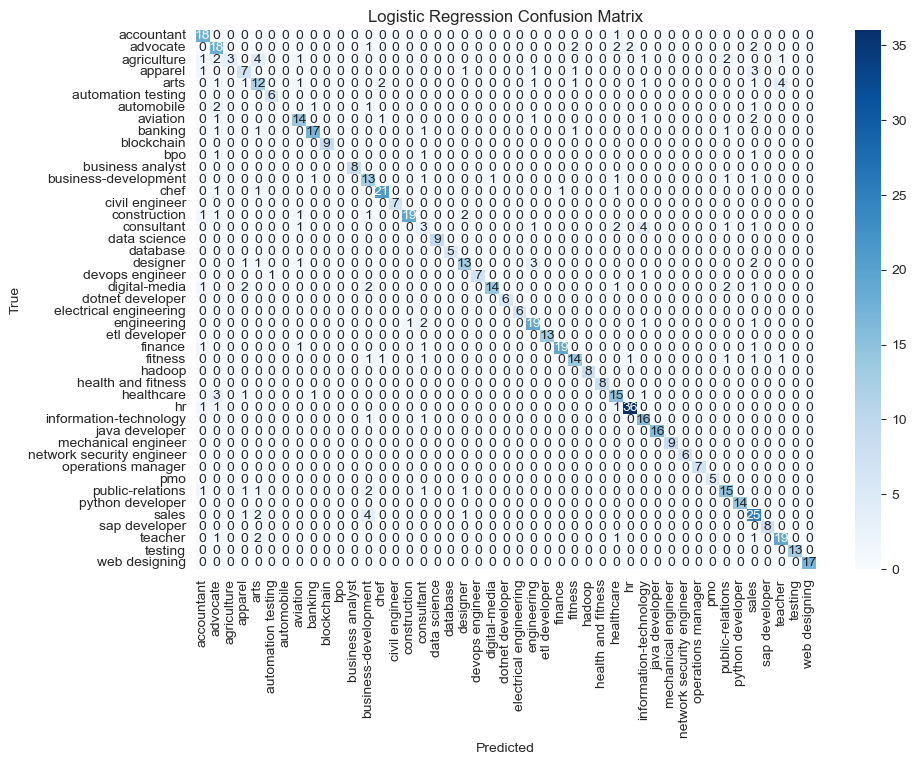


Training KNN Classifier...

KNN Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.95      0.61        19
           1       0.45      0.52      0.48        27
           2       0.40      0.27      0.32        15
           3       0.27      0.43      0.33        14
           4       0.85      0.44      0.58        25
           5       0.75      1.00      0.86         6
           6       0.17      0.20      0.18         5
           7       0.47      0.40      0.43        20
           8       0.65      0.50      0.56        22
           9       1.00      1.00      1.00         9
          10       0.50      0.33      0.40         3
          11       0.80      1.00      0.89         8
          12       0.28      0.74      0.41        19
          13       0.86      0.72      0.78        25
          14       1.00      1.00      1.00         7
          15       0.86      0.72      0.78        25
          16 

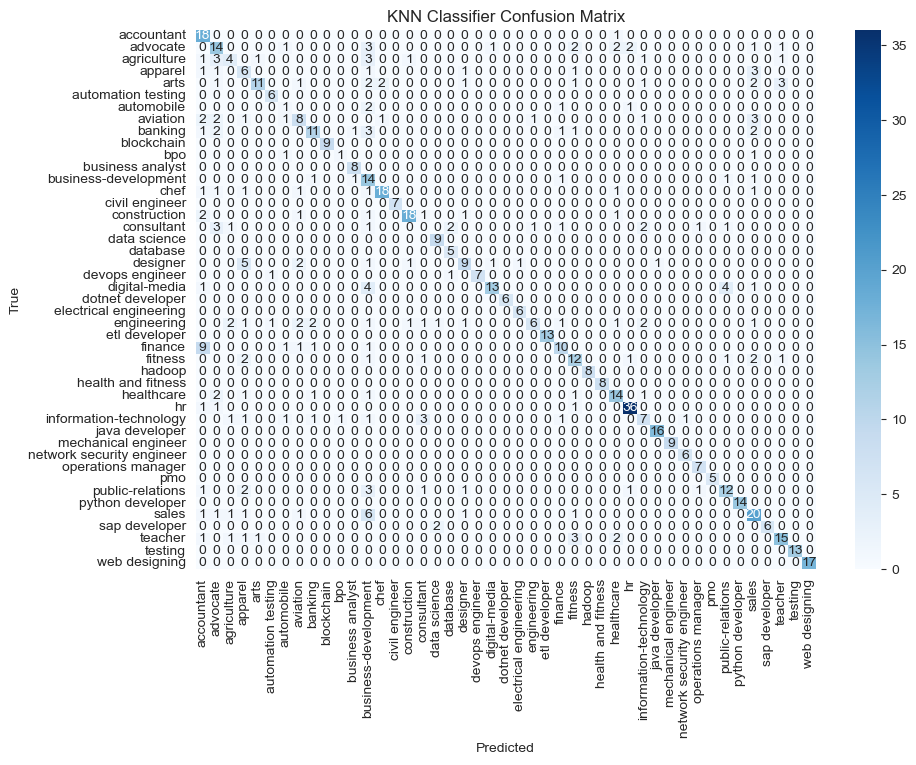


Training Decision Tree Classifier...

Decision Tree Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.68      0.63      0.65        27
           2       0.53      0.60      0.56        15
           3       0.33      0.36      0.34        14
           4       0.47      0.56      0.51        25
           5       0.86      1.00      0.92         6
           6       0.33      0.20      0.25         5
           7       0.74      0.85      0.79        20
           8       0.45      0.45      0.45        22
           9       1.00      1.00      1.00         9
          10       0.25      0.33      0.29         3
          11       1.00      1.00      1.00         8
          12       0.50      0.53      0.51        19
          13       0.81      0.84      0.82        25
          14       1.00      1.00      1.00         7
          15       0.88      0.84      0.86    

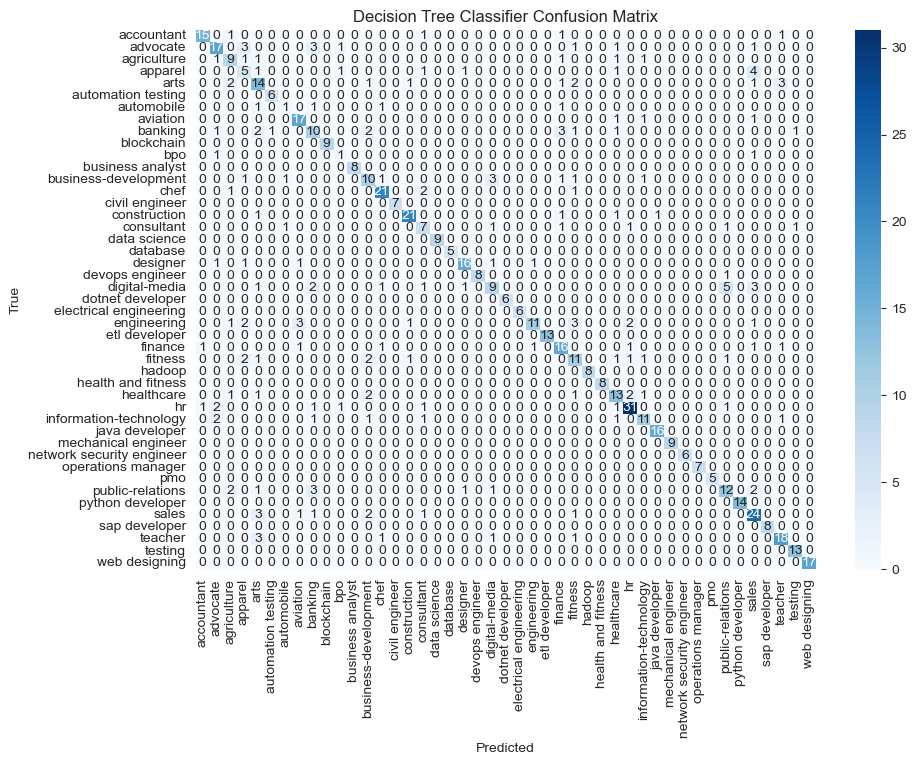


Training Random Forest Classifier...

Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.95      0.82        19
           1       0.49      0.63      0.55        27
           2       0.67      0.13      0.22        15
           3       0.86      0.43      0.57        14
           4       0.67      0.32      0.43        25
           5       1.00      1.00      1.00         6
           6       0.00      0.00      0.00         5
           7       0.81      0.85      0.83        20
           8       0.75      0.68      0.71        22
           9       1.00      1.00      1.00         9
          10       0.00      0.00      0.00         3
          11       1.00      1.00      1.00         8
          12       0.40      0.53      0.45        19
          13       0.81      0.84      0.82        25
          14       1.00      1.00      1.00         7
          15       0.84      0.84      0.84    

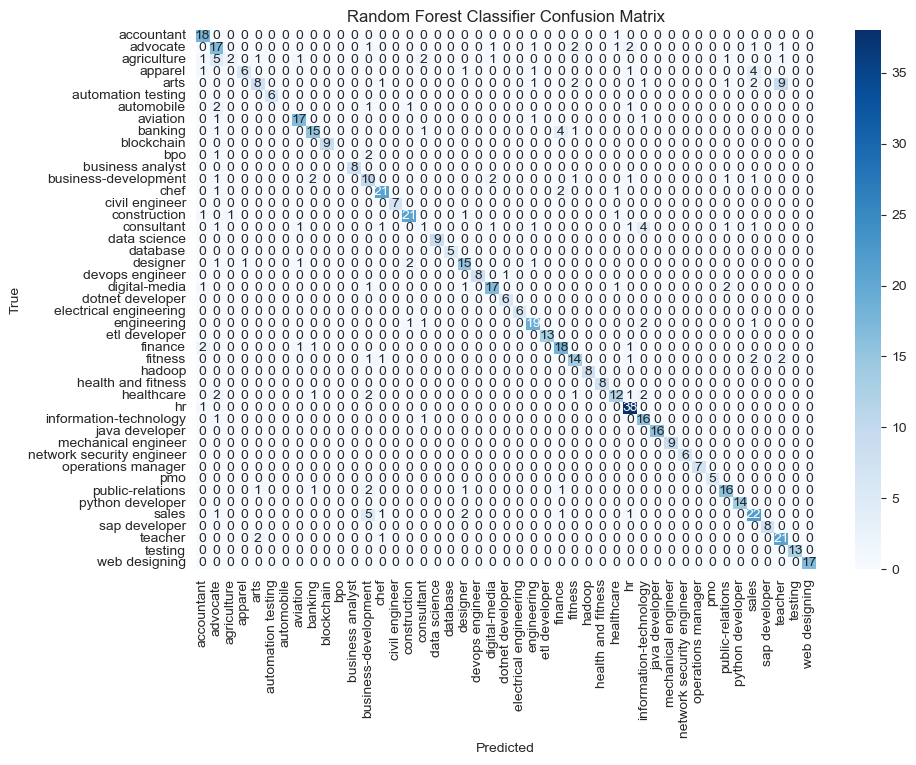


Training SVM Classifier...

SVM Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.89      0.83        19
           1       0.44      0.67      0.53        27
           2       1.00      0.13      0.24        15
           3       0.50      0.50      0.50        14
           4       0.43      0.52      0.47        25
           5       1.00      1.00      1.00         6
           6       0.00      0.00      0.00         5
           7       0.76      0.65      0.70        20
           8       0.83      0.68      0.75        22
           9       1.00      1.00      1.00         9
          10       0.00      0.00      0.00         3
          11       1.00      1.00      1.00         8
          12       0.52      0.63      0.57        19
          13       0.89      0.64      0.74        25
          14       1.00      1.00      1.00         7
          15       0.95      0.72      0.82        25
          16 

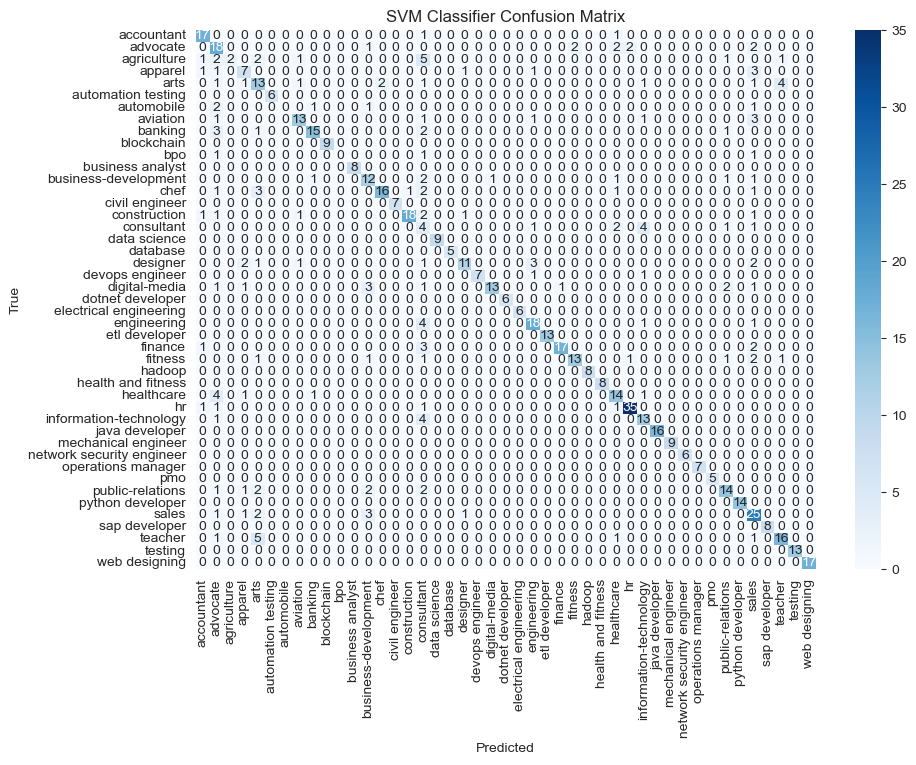


Training Bagging Classifier...

Bagging Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93        19
           1       0.95      0.78      0.86        27
           2       0.60      0.60      0.60        15
           3       0.67      0.57      0.62        14
           4       0.62      0.64      0.63        25
           5       0.86      1.00      0.92         6
           6       0.50      0.20      0.29         5
           7       0.90      0.90      0.90        20
           8       0.86      0.55      0.67        22
           9       1.00      1.00      1.00         9
          10       0.00      0.00      0.00         3
          11       1.00      1.00      1.00         8
          12       0.55      0.58      0.56        19
          13       1.00      0.88      0.94        25
          14       1.00      1.00      1.00         7
          15       0.92      0.88      0.90        25
     

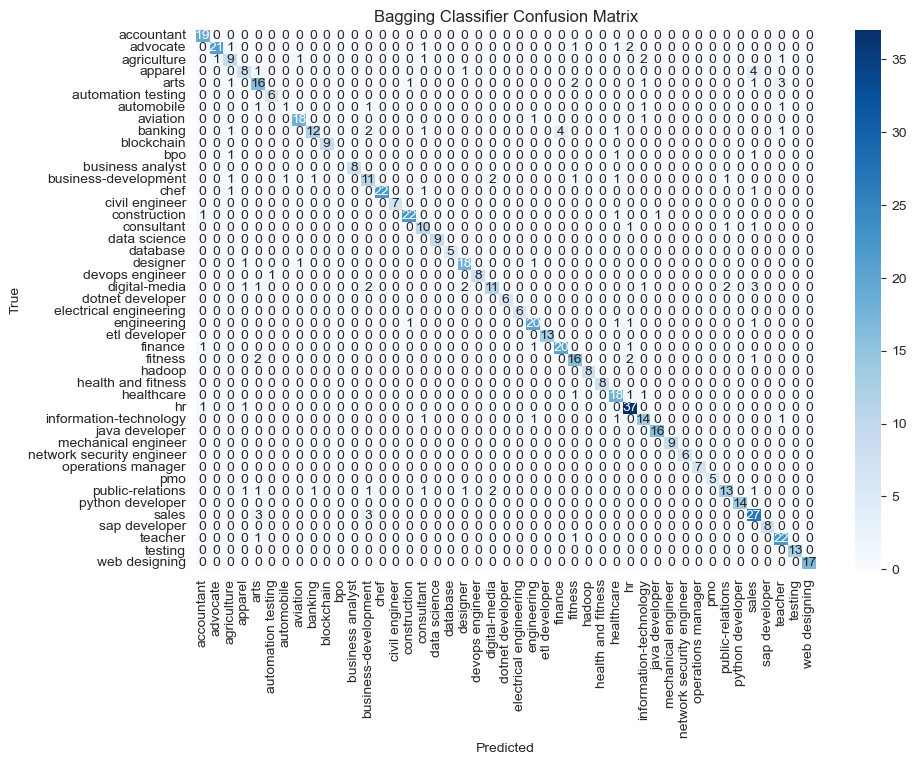


Training Gradient Boosting Classifier...

Gradient Boosting Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       0.95      0.74      0.83        27
           2       0.91      0.67      0.77        15
           3       0.64      0.50      0.56        14
           4       0.42      0.68      0.52        25
           5       0.86      1.00      0.92         6
           6       0.50      0.20      0.29         5
           7       0.86      0.90      0.88        20
           8       0.84      0.73      0.78        22
           9       1.00      1.00      1.00         9
          10       0.50      0.33      0.40         3
          11       1.00      1.00      1.00         8
          12       0.68      0.68      0.68        19
          13       1.00      0.84      0.91        25
          14       1.00      1.00      1.00         7
          15       0.88      0.88      

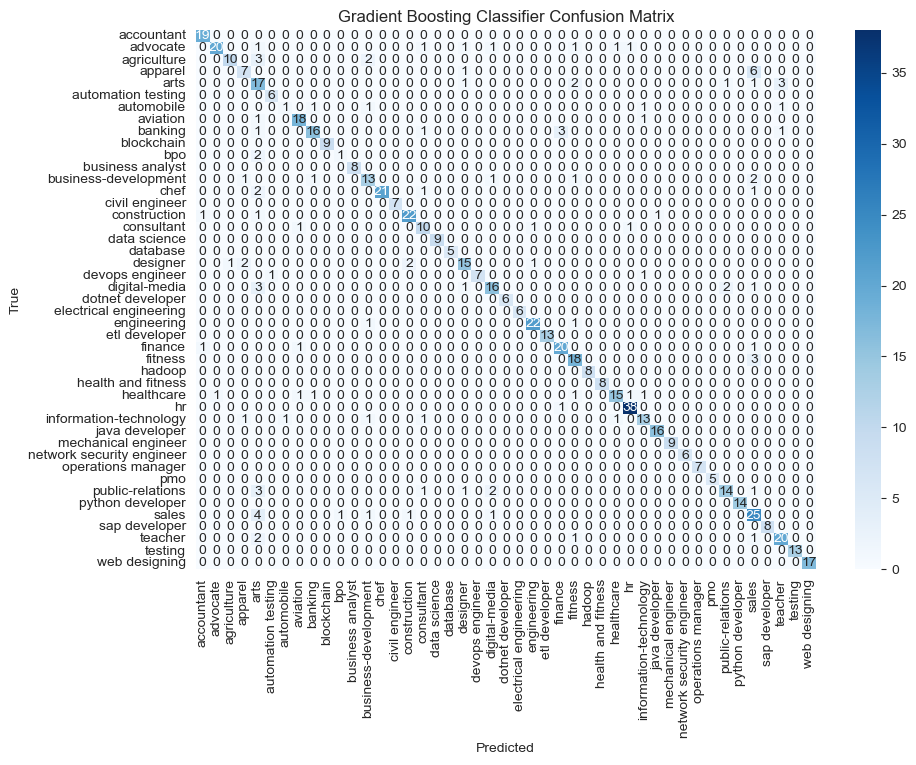


Training Naive Bayes Classifier...

Naive Bayes Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.95      0.56        19
           1       0.45      0.63      0.52        27
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00        14
           4       0.69      0.44      0.54        25
           5       1.00      0.33      0.50         6
           6       0.00      0.00      0.00         5
           7       0.67      0.50      0.57        20
           8       0.93      0.59      0.72        22
           9       1.00      1.00      1.00         9
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         8
          12       0.32      0.68      0.43        19
          13       0.90      0.72      0.80        25
          14       0.00      0.00      0.00         7
          15       0.68      0.68      0.68        

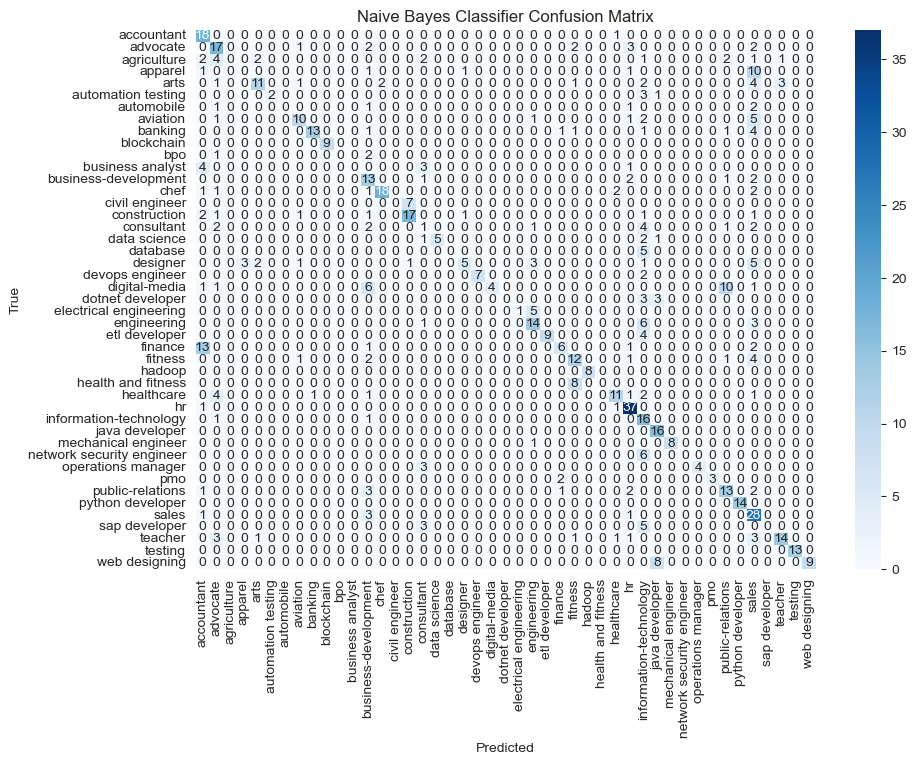

In [73]:
# Training and Evaluation
results = []
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report["macro avg"]["precision"]
    recall = report["macro avg"]["recall"]
    f1 = report["macro avg"]["f1-score"]

    # Save results
    results.append({
    "Model": name,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1
    })

    # Print classification report
    print(f"\n{name} Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

In [74]:
# Create DataFrame of Results
metrics_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)

In [75]:
print("\nModel Performance Comparison:")
print(metrics_df)


Model Performance Comparison:
                          Model  Accuracy  Precision    Recall  F1-Score
6  Gradient Boosting Classifier  0.837681   0.874013  0.853126  0.858484
5            Bagging Classifier  0.830435   0.848524  0.843141  0.841197
0           Logistic Regression  0.778261   0.808991  0.796200  0.793165
3      Random Forest Classifier  0.771014   0.794180  0.790241  0.782468
4                SVM Classifier  0.740580   0.810591  0.770394  0.776768
2      Decision Tree Classifier  0.736232   0.785745  0.784146  0.781811
1                KNN Classifier  0.671014   0.728311  0.727649  0.712851
7        Naive Bayes Classifier  0.559420   0.559717  0.479915  0.476908


<Figure size 1200x800 with 0 Axes>

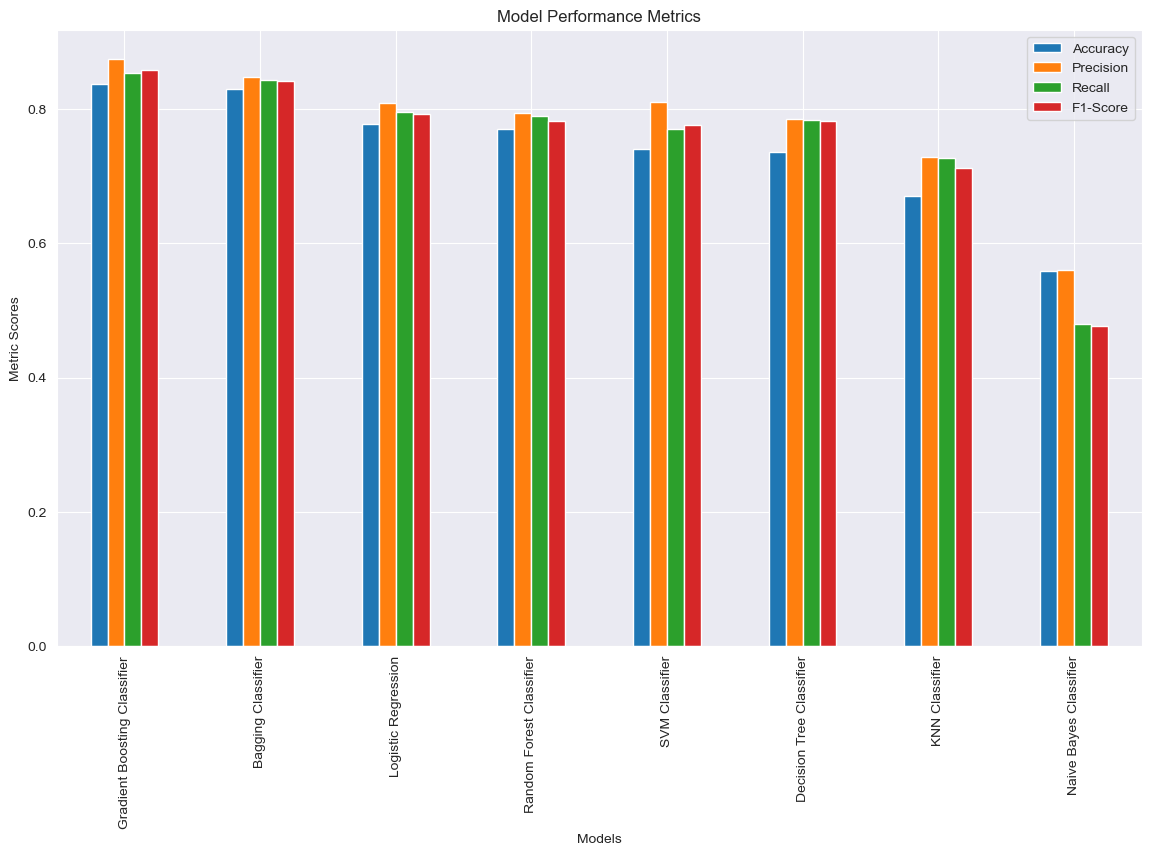

In [76]:
# Bar Plot for Metrics
plt.figure(figsize=(12, 8))
metrics_df.set_index("Model").plot(kind="bar", figsize=(14, 8))
plt.title("Model Performance Metrics")
plt.ylabel("Metric Scores")
plt.xlabel("Models")
plt.grid(True)
plt.legend(loc="best")
plt.show()